In [25]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for theta ~ gamma(a,b)
a1 = 120
b1 = 10
prior = st.gamma(a1, scale= 1/b1)

# data in group A(no bachelor's) and posterior distribution
# n=number of observed women, sy=sum of their numbers of chldren
nA = 10
syA = 117
postA = st.gamma(a1+syA, scale=1/(b1+nA))



In [26]:
# prior parameters for theta ~ gamma(a,b)
a2 = 12
b2 = 1
prior = st.gamma(a2, scale= 1/b2)

# data in group B(bachelor's) and posterior distribution
nB = 13
syB = 113
postB = st.gamma(a2+syB, scale=1/(b2+nB))

#### Group A Bayesian Analysis

In [27]:
# posterior mean (Group A)
(a1+syA)/(b1+nA)

11.85

In [28]:
# posterior mode (Group A)
(a1+syA-1)/(b1+nA)

11.8

In [29]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

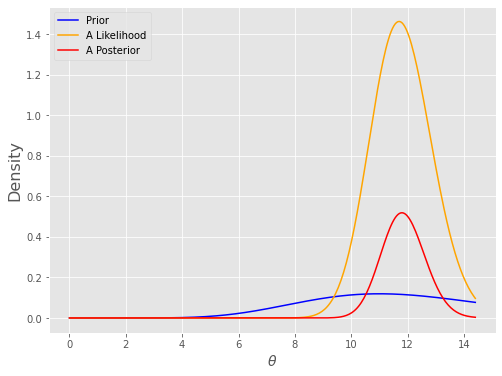

In [30]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, (10**-74)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Group B Bayesian Analysis

In [31]:
# posterior mean (Group B)
(a2+syB)/(b2+nB)

8.928571428571429

In [32]:
# posterior mode (Group B)
(a2+syB-1)/(b2+nB)

8.857142857142858

In [33]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

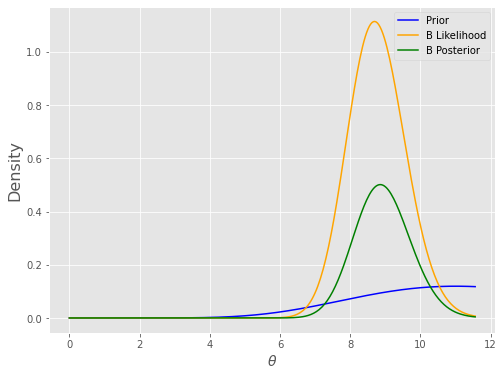

In [34]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, (10**-57)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Comparing Two Posterior Distributions



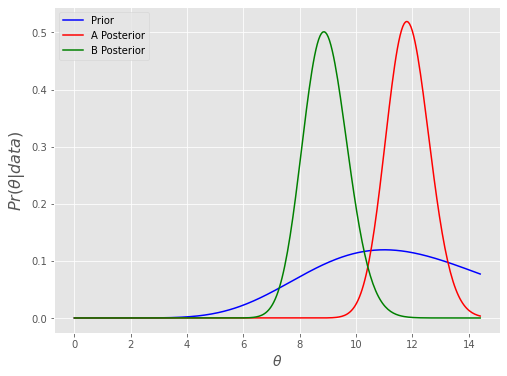

In [35]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

#### Posterior Predictive Distributions for number of children



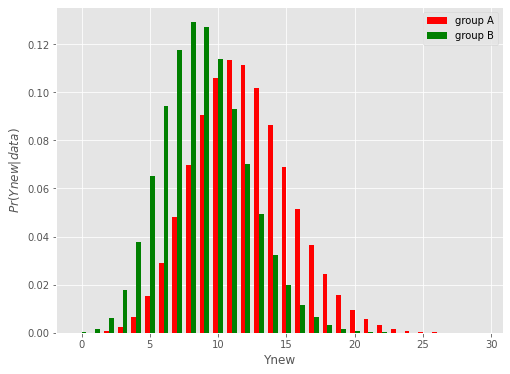

In [37]:
ynew = np.arange(30)
postpredA = st.nbinom.pmf(ynew, a1+syA, (b1+nA)/(b1+nA+1))
postpredB = st.nbinom.pmf(ynew, a2+syB, (b2+nB)/(b2+nB+1))
width = 0.35  # the width of the bars
plt.figure(figsize=(8, 6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red')
plt.bar(ynew + width/2, postpredB, width, label='group B', color='green')
plt.xlabel('Ynew')
plt.ylabel(r'$Pr(Ynew|data)$')
plt.legend()
plt.show()

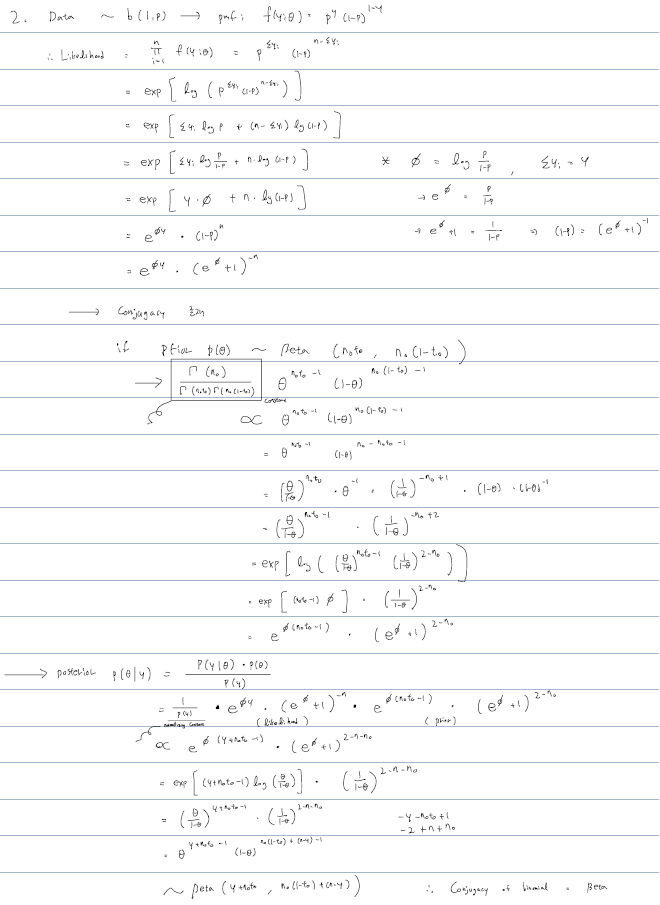

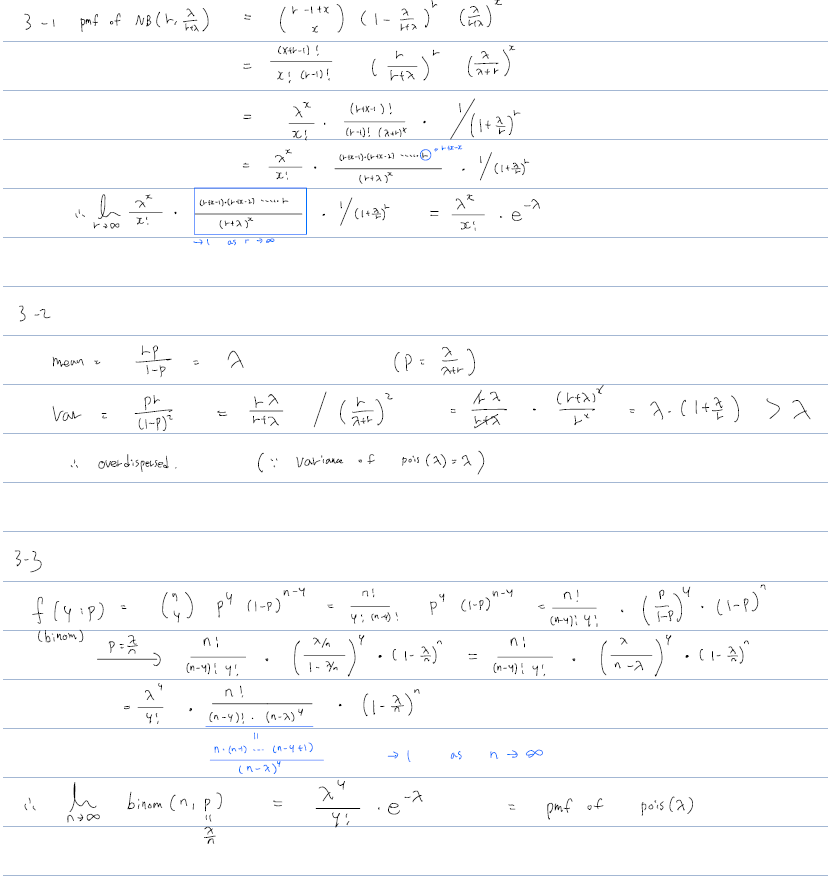